#A - Objective and Overview

## **Objective**

Use unsupervised learning to cluster similar wide receivers together in an attempt to improve fantasy football draft decisions

## **Feature Description:**
**DP**: draft pick where player was selected in the NFL draft

**REC_per_GP**: receptions per game

**REC_Yards_per_GP**: receiving yards per game

**REC_TDs_per_GP**: receiving touchdowns per game

**Yards_per_REC**: yards gained per receptions

**Touches_per_GP**: touches per game

**PPR_per_GP**: average fantasy points per game (PPR style scoring) in college

**Combined_REC_MS**: a metric designed to represent a player's receiving production in their college offense

**RecPTMPA**: receptions per team pass attempt

**REC_Yards_per_TM_PA**: receiving yards per team pass attempt

**REC_TDS_per_TM_PA**: receiving touchdowns per team pass attempt

**REC_CD**: represents the player's percentage of their team's offense in respect to the team's yardage and touchdowns

**WR_BOA_twenty**: the breakout age for wide receivers is defined by their age at the beginning of the college football season when they first posted a Dominator Rating at or above 20% (from playerprofiler.com)

**WR_BOA_thirty**: the breakout age for wide receivers is defined by their age at the beginning of the college football season when they first posted a Dominator Rating at or above 30% (from playerprofiler.com)

**yards_per_rec_over_tm_avg**: receiving yards per reception compared to the player's college team performance of receiving yards per reception

**BMI**: body mass index (BMI) recorded during the NFL Combine. Formula = Mass (lb) / Height (in)^2 x 703

**Hand_Size**: the distance from the tip of the pinky to the tip of the thumb with the fingers spread out (recorded at NFL combine)

**Arm_Length**: the distance from the end of the bicep or shoulder blade to the tip of the middle finger with the arm extended (recorded at NFL combine)

**forty_time**: time it takes a player to complete a sprint measuring 40 yards. Times not recorded at the NFL combine are adjusted by adding .05 seconds to the player time.

**Power_5_Conference**: indicates whether the player played for a school belonging in one of the 'Power 5 Conferences' (Big 10, Big 12, ACC, SEC, or PAC-12) (0 = No, 1 = Yes)

**Early_Declare**: indicates whether a player declared for the NFL draft before his senior year season (0 = No, 1 = Yes)

**Agility Score**: a metric intended to measure a player's lateral agility and quickness

**Height Adjusted Speed Score (HaSS)**: an athleticism metric developed by Shawn Siegele that creates a metric for wide receivers that adjusts a player's 40 time for height.

**Relative Athletic Score (RAS)**: a metric created by Kent Lee Platte that can easily and intuitively gauge a player’s athletic abilities relative to the position they play

**Freak Score**: an athleticism metric that accounts for the height, weight, and speed of a prospect

## **Recognition:**
Credit to FF_Spaceman for the dataset. Data source: https://docs.google.com/spreadsheets/d/1H8Gqmq7EOfIxS_LG72iAhIhpKJZJyjjOZnGarXZrjp0/edit#gid=279165759



#B - Setup

##1.0 Import Libraries and Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [ ]:
df = pd.read_csv('2023_WR_Database.csv', header = 2)

##2.0 Preview Data

In [ ]:
df.head(50)

,Player,School,Conf,DOB,DR,DP,Draft Year,Draft Age,NCAA Szns,18,...,40 time.1,Bench.1,Vertical.1,Broad.1,Shuttle.1,3 Cone.1,Top 5 WR,Top 12 WR,Top 24 WR,AVG PPG YR 1-3
0,Adonicas Sanders,Temple,American,1/13/1999,UDFA,UDFA,2023,24,4.0,NaN,...,-,-,-,-,-,-,-,-,-,-
1,Amare Jones,Georgia Southern,Sun Belt,8/29/2000,UDFA,UDFA,2023,23,5.0,12.0,...,-,-,-,-,-,-,-,-,-,-
2,Andrei Iosivas,Princeton,FCS,10/15/1999,6,206,2023,23,3.0,NaN,...,-,-,-,-,-,-,-,-,-,-
3,Antoine Green,N. Carolina,ACC,11/15/1999,7,219,2023,23,5.0,3.0,...,-,-,-,-,-,-,-,-,-,-
4,AT Perry,Wake Forest,ACC,10/26/1999,6,195,2023,23,4.0,NaN,...,-,-,-,-,-,-,-,-,-,-
5,Braydon Johnson,Oklahoma ST,Big 12,12/2/1998,UDFA,UDFA,2023,24,5.0,3.0,...,-,-,-,-,-,-,-,-,-,-
6,Bryce Ford-Wheaton,W. Virginia,Big 12,3/9/2000,UDFA,UDFA,2023,23,4.0,NaN,...,-,-,-,-,-,-,-,-,-,-
7,Brycen Tremayne,Stanford,Pac-12,11/18/1999,UDFA,UDFA,2023,23,4.0,NaN,...,-,-,-,-,-,-,-,-,-,-
8,Carlos Carriere,C. Michigan,MAC,2/24/1999,UDFA,UDFA,2023,24,4.0,NaN,...,-,-,-,-,-,-,-,-,-,-
9,Cedric Tillman,Tennessee,SEC,4/19/2000,3,74,2023,23,5.0,1.0,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df.describe()

,Draft Year,Draft Age,NCAA Szns,18,19,20,21,22,23,18.1,...,PPR Points.3,PPR/ Touch.3,Kick Returns.3,KR Yards.3,Returns.3,Return Yards.3,Return TDs.3,Total Touches.3,Total Yards.3,Total TDs.3
count,973.000000,973.000000,972.000000,438.000000,754.000000,863.000000,815.000000,450.000000,110.000000,438.000000,...,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,2014.305242,22.424460,3.541152,8.130137,9.526525,10.472769,11.047853,10.973333,10.936364,5.175799,...,135.127441,3.023844,3.846968,89.251079,7.333402,126.739979,0.197328,53.311716,752.680473,5.279651
std,6.156928,0.916076,0.805078,3.803402,3.459876,3.032521,2.695235,2.795829,2.693101,17.663357,...,61.636761,0.673153,6.830340,168.651316,10.845560,209.084820,0.490772,28.140174,373.824569,3.007996
min,2003.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.300000,0.600000,0.000000,-1.000000,0.000000,-15.000000,0.000000,2.500000,12.300000,0.000000
25%,2009.000000,22.000000,3.000000,5.000000,8.000000,9.000000,10.000000,10.000000,10.000000,0.000000,...,90.300000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,33.300000,486.000000,3.300000
50%,2015.000000,22.000000,4.000000,9.000000,11.000000,11.000000,12.000000,12.000000,12.000000,0.000000,...,129.200000,3.000000,0.300000,4.300000,1.800000,25.000000,0.000000,48.300000,694.300000,4.800000
75%,2020.000000,23.000000,4.000000,11.000000,12.000000,13.000000,13.000000,13.000000,13.000000,3.000000,...,172.000000,3.400000,4.300000,88.700000,10.800000,164.000000,0.000000,67.300000,955.700000,6.800000
max,2023.000000,26.000000,6.000000,14.000000,15.000000,16.000000,16.000000,15.000000,14.000000,190.000000,...,443.900000,8.700000,42.500000,1139.000000,66.500000,1329.000000,4.000000,224.800000,2804.500000,20.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Columns: 522 entries, Player to AVG PPG YR 1-3
dtypes: float64(238), int64(65), object(219)
memory usage: 3.9+ MB


##3.0 Data Preprocessing, Cleaning, and Feature Engineering

###3.1 Remove Undrafted Free Agents (UDFA) from Dataset

In [ ]:
#Remove undrafted players from dataset
df = df[df.DR != 'UDFA']
df = df[df.DP != 'UDFA']

In [ ]:
#df = df.rename(columns={"Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "NCAA Szns": "NCAA_Szns", "RushATTGP": "Rush_ATT_per_GP", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age"})



#'Rush_ATT_per_GP', 'Rush_Yards_per_GP', 'Rush_TDs_per_GP', 'Yards_per_Carry', 'REC_per_GP', 'REC_Yards_per_GP', 'REC_TDs_per_GP', 'Yards_per_REC', 'Touches_per_GP', 'PPR_per_GP', 'Combined_RUSH_MS', 'Combined_REC_MS', 'Yds_per_Carry_Over_TM_AVG', 'Yards_per_TM_Rush_ATT', 'RUSH_CD', 'REC_CD', 'RB_BOA', 'forty_time', 'Agility_Score', 'three_cone', 'Top_5_RB', 'Top_12_RB', 'Top_24_RB', 'AVG_PPG_YR_1_3']

###3.2 Select Columns of Interest

In [ ]:
draft_df = df[['Player', 
               'Conf',
               'DR', 
               'DP', 
               'Draft Year', 
               'Draft Age', 
               'NCAA Szns',
               'GP',
               'REC',
               'REC Yards',
               'REC TDs',
               'Touches',
               'Yards/ REC',
               'PPR Points',
               'Combined REC MS',
               'RecPTMPA',
               'YDs/REC Over TM AVG',
               'REC Yards/TM PA',
               'REC TDS/TM PA',
               'REC CD',
               'WR BOA (20%)',
               'WR BOA (30%)',
               'BMI',
               'Hand Size',
               'Arm Length',
               '40 time',
               'Agility Score',
               'HaSS',
               'RAS',
               'Freak Score',
               'Top 5 WR',
               'Top 12 WR',
               'Top 24 WR',
               'AVG PPG YR 1-3'
]]

In [ ]:
draft_df.head()

,Player,Conf,DR,DP,Draft Year,Draft Age,NCAA Szns,GP,REC,REC Yards,...,Arm Length,40 time,Agility Score,HaSS,RAS,Freak Score,Top 5 WR,Top 12 WR,Top 24 WR,AVG PPG YR 1-3
2,Andrei Iosivas,FCS,6,206,2023,23,3.0,29,125,1909,...,32.00,4.43,10.97,110.85,9.92,66.37,-,-,-,-
3,Antoine Green,ACC,7,219,2023,23,5.0,34,90,1710,...,32.13,4.47,11.26,101.05,8.05,56.27,-,-,-,-
4,AT Perry,ACC,6,195,2023,23,4.0,36,172,2662,...,-,-,-,-,9.24,-,-,-,-,-
9,Cedric Tillman,SEC,3,74,2023,23,5.0,24,109,1622,...,32.75,4.54,-,104.41,9.56,59.91,-,-,-,-
10,Charlie Jones,Big Ten,4,131,2023,24,4.0,46,149,2079,...,31.63,4.43,-,84.80,-,38.91,-,-,-,-


###3.3 Rename Columns

In [ ]:
draft_df = draft_df.rename(columns={"Draft Year": "draft_year", 
                                    "Draft Age": "draft_age", 
                                    "NCAA Szns": "ncaa_szns", 
                                    "REC Yards": "rec_yards", 
                                    "REC TDs": "rec_tds", 
                                    "Yards/ Carry": "yards_per_carry", 
                                    "Yards/ REC": "yards_per_rec", 
                                    "PPR Points": "ppr_points", 
                                    "Combined REC MS": "combined_rec_ms", 
                                    "YDs/REC Over TM AVG": "yards_per_rec_over_tm_avg", 
                                    "REC Yards/TM PA": "rec_yards_per_tm_pa",
                                    "REC TDS/TM PA": "rec_tds_per_tm_pa",
                                    "REC CD": "rec_cd", 
                                    "WR BOA (20%)": "wr_boa_twenty", 
                                    "WR BOA (30%)": "wr_boa_thirty", 
                                    "Hand Size": "hand_size",
                                    "Arm Length": "arm_length",
                                    "40 time": "forty_time", 
                                    "Agility Score": "agility_score",
                                    "Freak Score": "freak_score", 
                                    "Top 5 WR": "top_5_wr", 
                                    "Top 12 WR": "top_12_wr", 
                                    "Top 24 WR": "top_24_wr", 
                                    "AVG PPG YR 1-3": "avg_ppg_yr_1_3"})                 

###3.3 Replace and Convert Non-numeric Data to Numeric

In [ ]:
#replace '-' with 24, indicating they did not breakout in college (assuming college years age 18-23)
draft_df['wr_boa_twenty'] = draft_df['wr_boa_twenty'].replace('-',24)
draft_df['wr_boa_thirty'] = draft_df['wr_boa_thirty'].replace('-',24)

#Replace non-numeric values
draft_df['BMI'] = draft_df['BMI'].replace('-',np.nan);
draft_df['forty_time'] = draft_df['forty_time'].replace('-',np.nan);
draft_df['agility_score'] = draft_df['agility_score'].replace('-',np.nan);
draft_df['hand_size'] = draft_df['hand_size'].replace('-',np.nan);
draft_df['arm_length'] = draft_df['arm_length'].replace('-',np.nan);
draft_df['freak_score'] = draft_df['freak_score'].replace('-',np.nan);

#draft_df['Broad'] = draft_df['Broad'].replace('-',np.nan);
draft_df['HaSS'] = draft_df['HaSS'].replace('-',np.nan);
draft_df['RAS'] = draft_df['RAS'].replace('-',np.nan);
draft_df['avg_ppg_yr_1_3'] = draft_df['avg_ppg_yr_1_3'].replace('-',0.0);
draft_df['yards_per_rec'] = draft_df['yards_per_rec'].replace('-',0.0)
draft_df['top_5_wr'] = draft_df['top_5_wr'].replace('-',0)
draft_df['top_12_wr'] = draft_df['top_12_wr'].replace('-',0)
draft_df['top_24_wr'] = draft_df['top_24_wr'].replace('-',0)

#convert data types to float
draft_df["DR"] = draft_df.DR.astype(float)
draft_df["DP"] = draft_df.DP.astype(float)
draft_df["wr_boa_twenty"] = draft_df.wr_boa_twenty.astype(float)
draft_df["wr_boa_thirty"] = draft_df.wr_boa_thirty.astype(float)
draft_df["BMI"] = draft_df.BMI.astype(float)
draft_df["hand_size"] = draft_df.hand_size.astype(float)
draft_df["arm_length"] = draft_df.arm_length.astype(float)
draft_df["freak_score"] = draft_df.freak_score.astype(float)
draft_df["combined_rec_ms"] = draft_df.combined_rec_ms.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["rec_cd"] = draft_df.rec_cd.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["forty_time"] = draft_df.forty_time.astype(float)
draft_df["agility_score"] = draft_df.agility_score.astype(float)
draft_df["avg_ppg_yr_1_3"] = draft_df.avg_ppg_yr_1_3.astype(float)
draft_df["yards_per_rec"] = draft_df.yards_per_rec.astype(float)
draft_df['HaSS'] = draft_df.HaSS.astype(float)
draft_df['RAS'] = draft_df.RAS.astype(float)
draft_df["top_5_wr"] = draft_df.top_5_wr.astype(float)
draft_df["top_12_wr"] = draft_df.top_12_wr.astype(float)
draft_df["top_24_wr"] = draft_df.top_24_wr.astype(float)

#Replace NaN with median
draft_df['yards_per_rec_over_tm_avg'] = draft_df['yards_per_rec_over_tm_avg'].fillna(draft_df['yards_per_rec_over_tm_avg'].median())
draft_df['BMI'] = draft_df['BMI'].fillna(draft_df['BMI'].median())
draft_df['forty_time'] = draft_df['forty_time'].fillna(draft_df['forty_time'].median())
draft_df['agility_score'] = draft_df['agility_score'].fillna(draft_df['agility_score'].median())
draft_df['HaSS'] = draft_df['HaSS'].fillna(draft_df['HaSS'].median())
draft_df['RAS'] = draft_df['RAS'].fillna(draft_df['RAS'].median())
draft_df['hand_size'] = draft_df['hand_size'].fillna(draft_df['hand_size'].median())
draft_df['arm_length'] = draft_df['arm_length'].fillna(draft_df['arm_length'].median())
draft_df['freak_score'] = draft_df['freak_score'].fillna(draft_df['freak_score'].median())

In [ ]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 972
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     628 non-null    object 
 1   Conf                       628 non-null    object 
 2   DR                         628 non-null    float64
 3   DP                         628 non-null    float64
 4   draft_year                 628 non-null    int64  
 5   draft_age                  628 non-null    int64  
 6   ncaa_szns                  627 non-null    float64
 7   GP                         628 non-null    int64  
 8   REC                        628 non-null    int64  
 9   rec_yards                  628 non-null    int64  
 10  rec_tds                    628 non-null    int64  
 11  Touches                    628 non-null    int64  
 12  yards_per_rec              628 non-null    float64
 13  ppr_points                 628 non-null    float64

###3.4 Feature Engineering

In [ ]:
#Create Power 5 Conference column based on college Conference column
draft_df['Power_5_Conference'] = np.nan
draft_df['Power_5_Conference'] = np.where((draft_df.Conf == 'ACC') | (draft_df.Conf == 'Big Ten') | (draft_df.Conf == 'Big 12') | (draft_df.Conf == 'Pac-12') | (draft_df.Conf == 'SEC'),1, 0)

#Create Early Declare column based on # of NCAA Seasons column
draft_df['Early_Declare'] = np.nan
draft_df['Early_Declare'] = np.where((draft_df.ncaa_szns <= 3),1, 0)

draft_df['rec_per_game'] = np.nan
draft_df['rec_per_game'] = draft_df['REC']/draft_df['GP']

draft_df['rec_yards_per_game'] = np.nan
draft_df['rec_yards_per_game'] = draft_df['rec_yards']/draft_df['GP']

draft_df['rec_tds_per_game'] = np.nan
draft_df['rec_tds_per_game'] = draft_df['rec_tds']/draft_df['GP']

draft_df['Touches_per_Game'] = np.nan
draft_df['Touches_per_Game'] = draft_df['Touches']/draft_df['GP']

draft_df['ppr_points_per_game'] = np.nan
draft_df['ppr_points_per_game'] = draft_df['ppr_points']/draft_df['GP']

#drop columns
draft_df = draft_df.drop(['Conf','ncaa_szns', 'REC', 'rec_yards', 'rec_tds', 'Touches', 'ppr_points', 'GP'],axis = 1)

In [ ]:
#Move AVG_PPG_YR_1_3 column to end of dataframe
df1 = draft_df.pop('avg_ppg_yr_1_3')
draft_df['avg_ppg_yr_1_3']=df1 

In [ ]:
draft_df.head()

,Player,DR,DP,draft_year,draft_age,yards_per_rec,combined_rec_ms,RecPTMPA,yards_per_rec_over_tm_avg,rec_yards_per_tm_pa,...,top_12_wr,top_24_wr,Power_5_Conference,Early_Declare,rec_per_game,rec_yards_per_game,rec_tds_per_game,Touches_per_Game,ppr_points_per_game,avg_ppg_yr_1_3
2,Andrei Iosivas,6.0,206.0,2023,23,15.3,0.3907,0.188,4.4,2.68,...,0.0,0.0,0,1,4.310345,65.827586,0.551724,4.482759,14.262069,0.0
3,Antoine Green,7.0,219.0,2023,23,19.0,0.1882,0.082,13.1,1.61,...,0.0,0.0,1,0,2.647059,50.294118,0.441176,2.647059,10.323529,0.0
4,AT Perry,6.0,195.0,2023,23,15.5,0.3426,0.171,4.0,2.49,...,0.0,0.0,1,0,4.777778,73.944444,0.777778,4.777778,16.838889,0.0
9,Cedric Tillman,3.0,74.0,2023,23,14.9,0.3435,0.171,10.9,2.89,...,0.0,0.0,1,0,4.541667,67.583333,0.708333,4.541667,15.550000,0.0
10,Charlie Jones,4.0,131.0,2023,24,14.0,0.4051,0.189,8.2,2.33,...,0.0,0.0,1,0,3.239130,45.195652,0.391304,3.478261,10.473913,0.0


In [ ]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 972
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     628 non-null    object 
 1   DR                         628 non-null    float64
 2   DP                         628 non-null    float64
 3   draft_year                 628 non-null    int64  
 4   draft_age                  628 non-null    int64  
 5   yards_per_rec              628 non-null    float64
 6   combined_rec_ms            628 non-null    float64
 7   RecPTMPA                   628 non-null    float64
 8   yards_per_rec_over_tm_avg  628 non-null    float64
 9   rec_yards_per_tm_pa        628 non-null    float64
 10  rec_tds_per_tm_pa          628 non-null    float64
 11  rec_cd                     628 non-null    float64
 12  wr_boa_twenty              628 non-null    float64
 13  wr_boa_thirty              628 non-null    float64

#C - Exploratory Data Analysis (EDA)

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

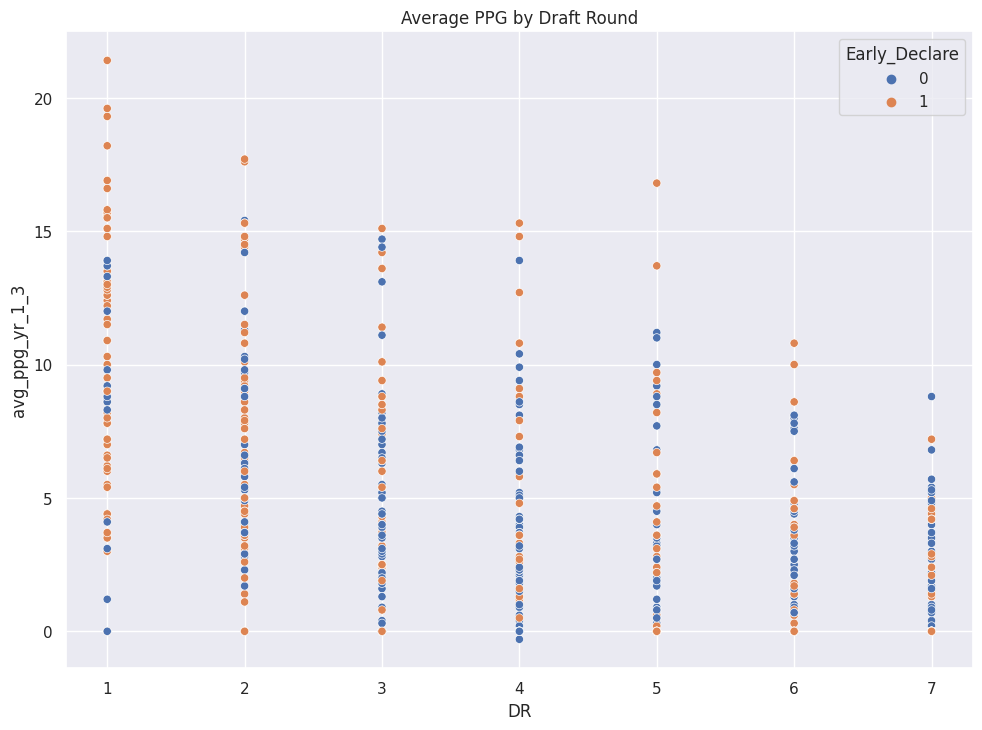

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='DR', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

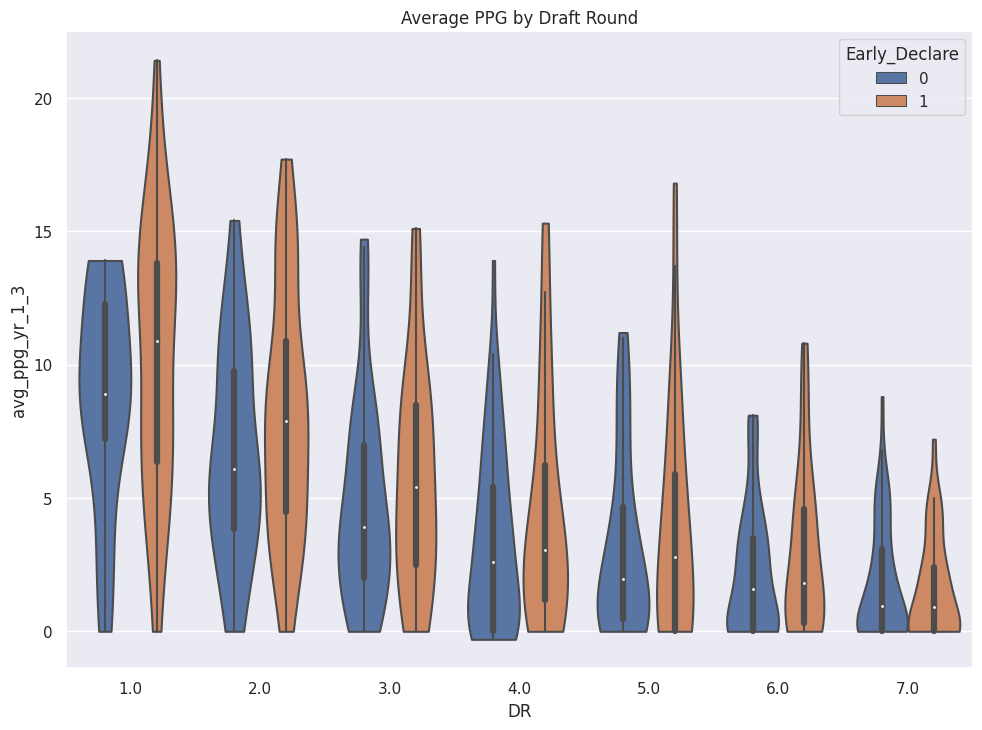

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='DR', y="avg_ppg_yr_1_3", hue = 'Early_Declare', cut=0).set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Pick')]

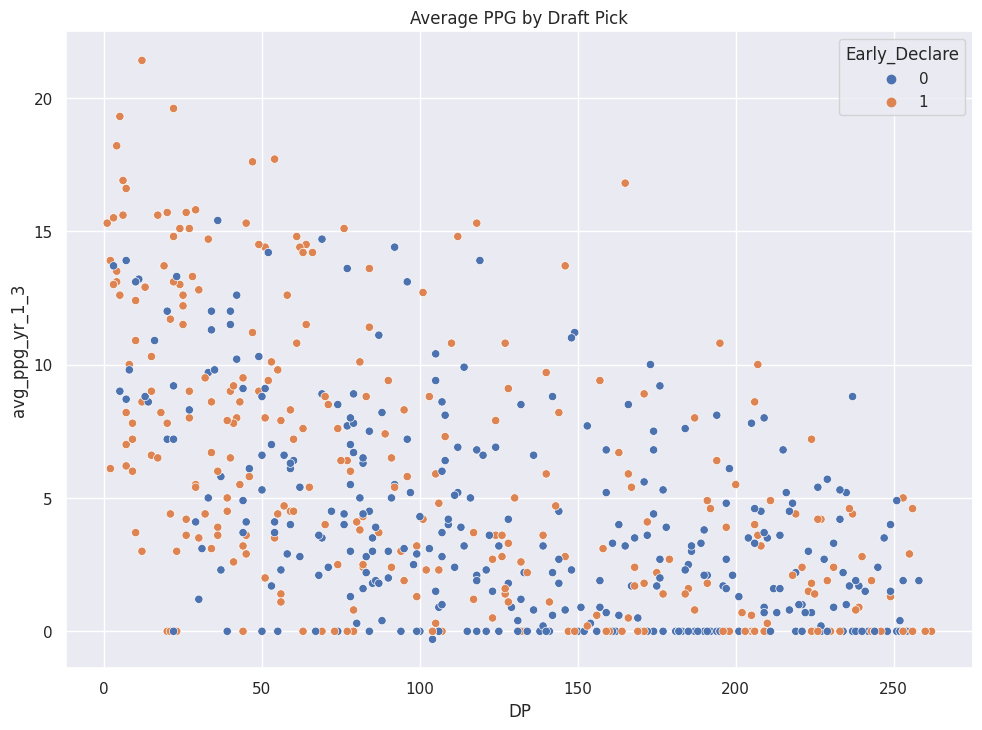

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='DP', y="avg_ppg_yr_1_3", hue='Early_Declare').set(title = 'Average PPG by Draft Pick')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

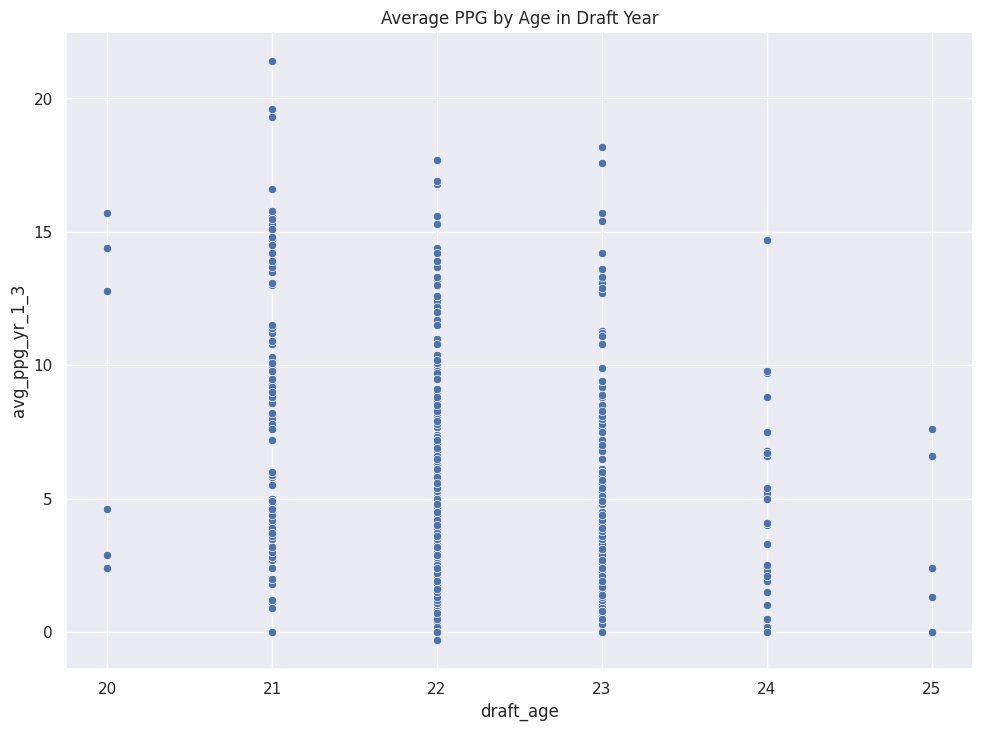

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='draft_age', y="avg_ppg_yr_1_3").set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

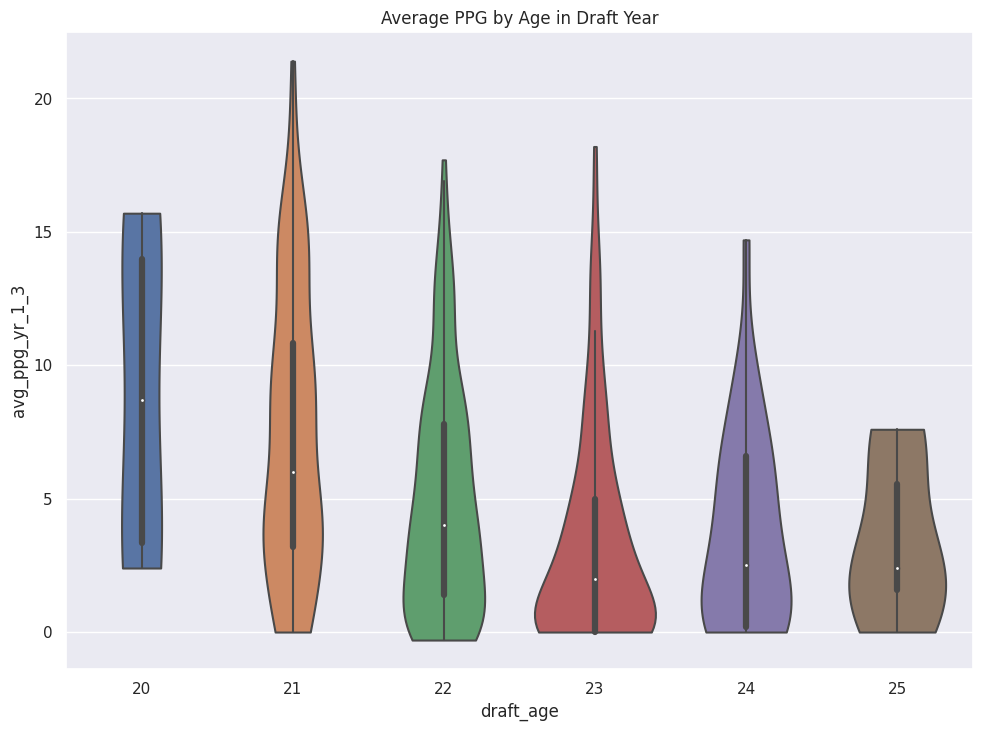

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='draft_age', y="avg_ppg_yr_1_3", cut=0).set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Early Declare Status')]

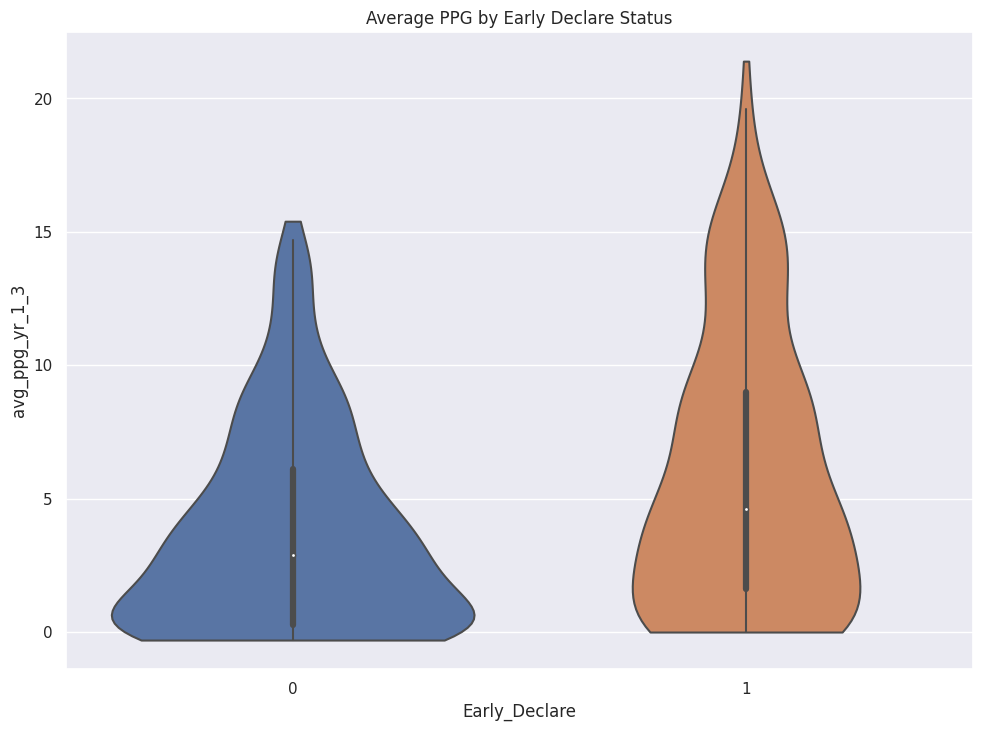

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='Early_Declare', y="avg_ppg_yr_1_3", cut=0).set(title = 'Average PPG by Early Declare Status')

[Text(0.5, 1.0, 'Average PPG by BMI')]

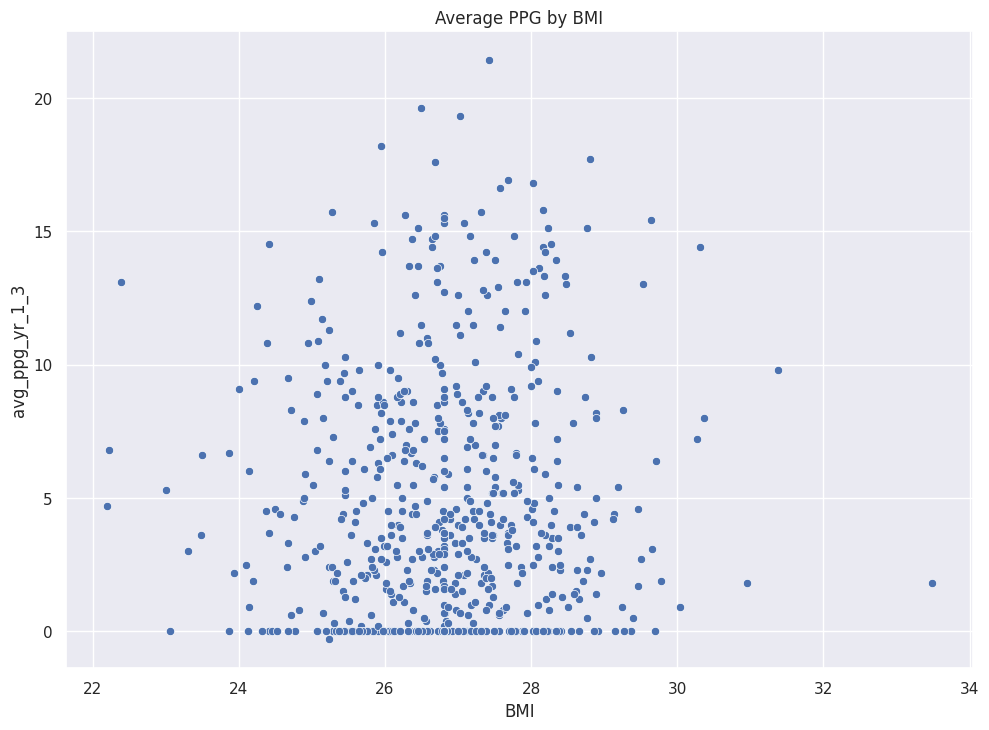

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='BMI', y="avg_ppg_yr_1_3").set(title = 'Average PPG by BMI')

[Text(0.5, 1.0, 'Average PPG by Combined Receiving Market Share')]

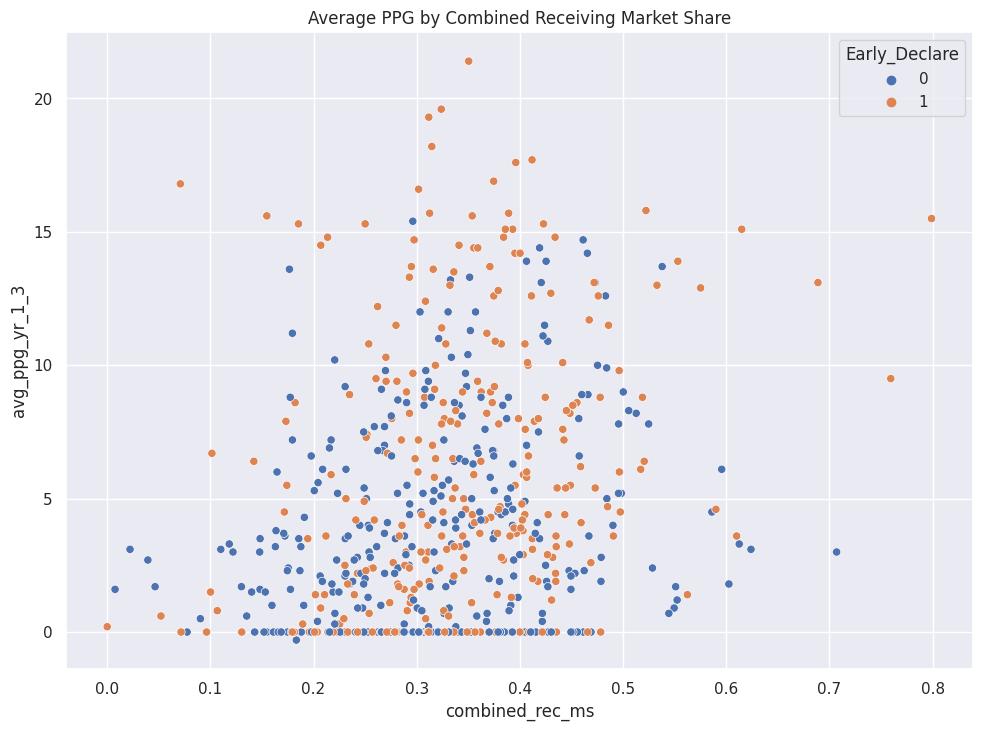

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='combined_rec_ms', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Combined Receiving Market Share')

[Text(0.5, 1.0, 'Average PPG by College Dominator Rating')]

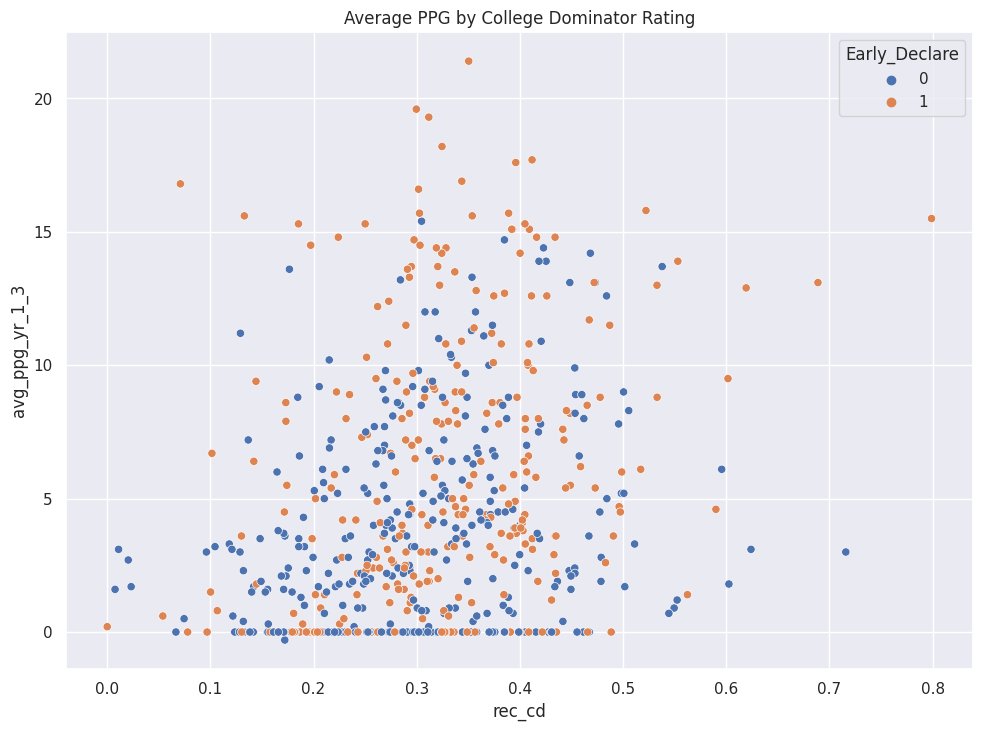

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='rec_cd', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by College Dominator Rating')

[Text(0.5, 1.0, 'Average PPG by WR Breakout Age 20%')]

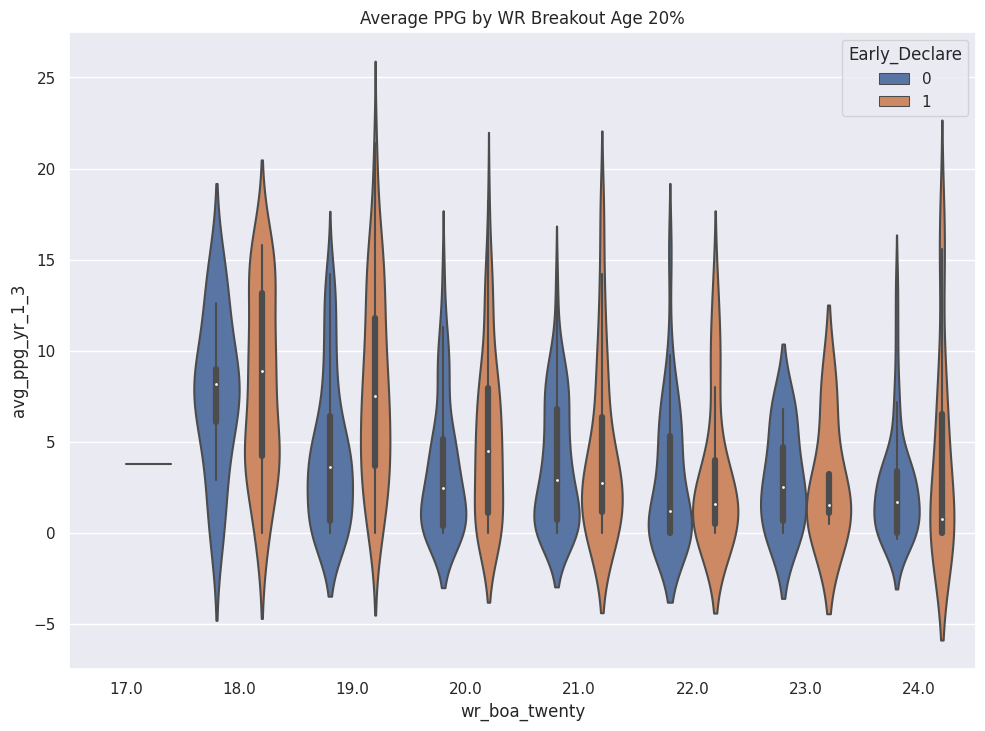

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='wr_boa_twenty', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by WR Breakout Age 20%')

[Text(0.5, 1.0, 'Average PPG by WR Breakout Age 30%')]

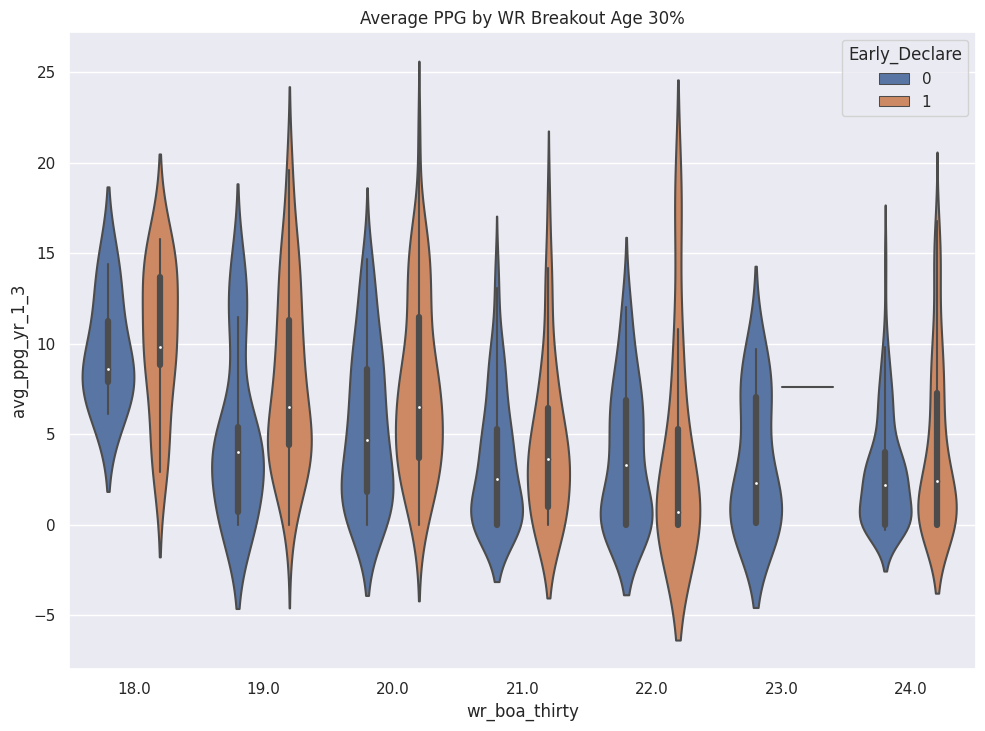

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='wr_boa_thirty', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by WR Breakout Age 30%')

[Text(0.5, 1.0, 'Average PPG by Hand Size')]

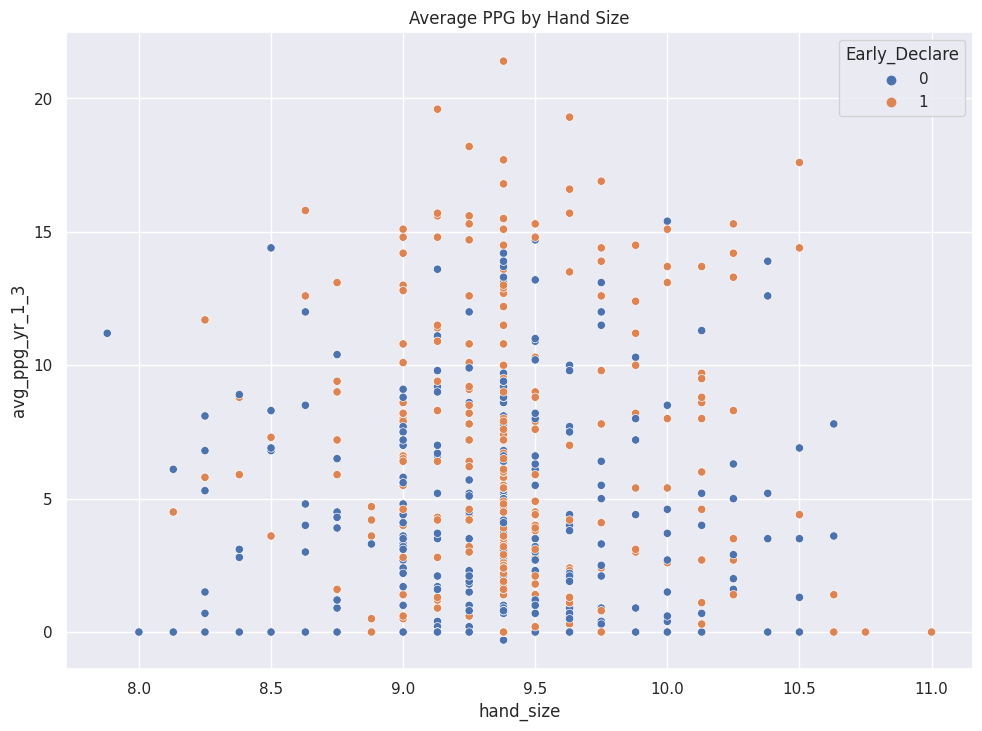

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='hand_size', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Hand Size')

[Text(0.5, 1.0, 'Average PPG by Arm Length')]

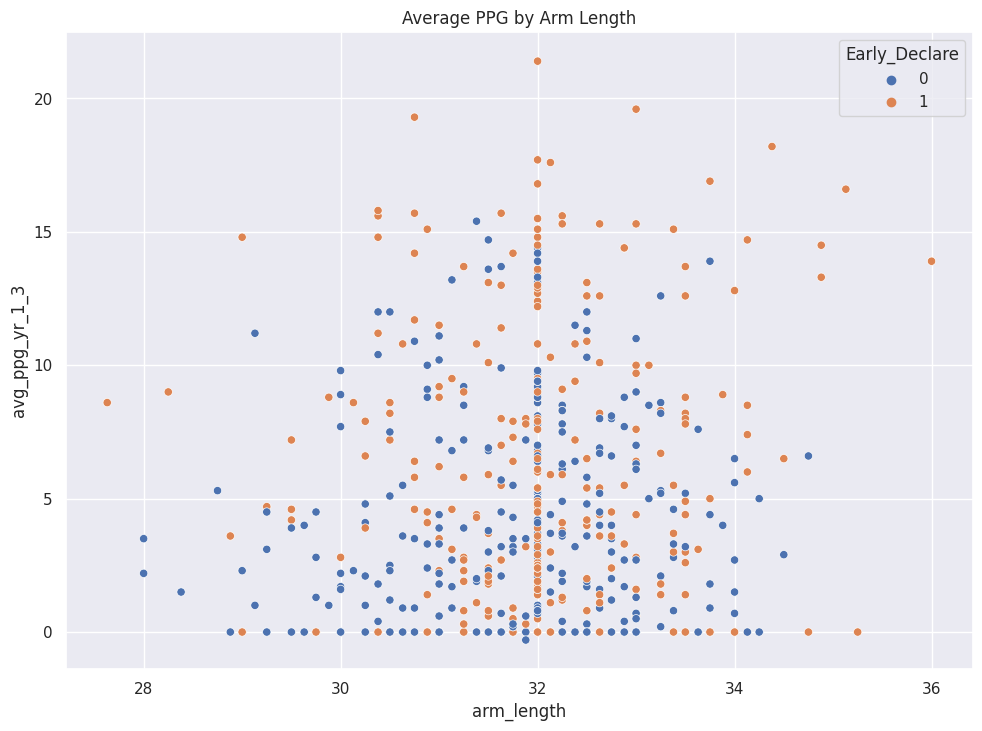

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='arm_length', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Arm Length')

[Text(0.5, 1.0, 'Average PPG by HaSS')]

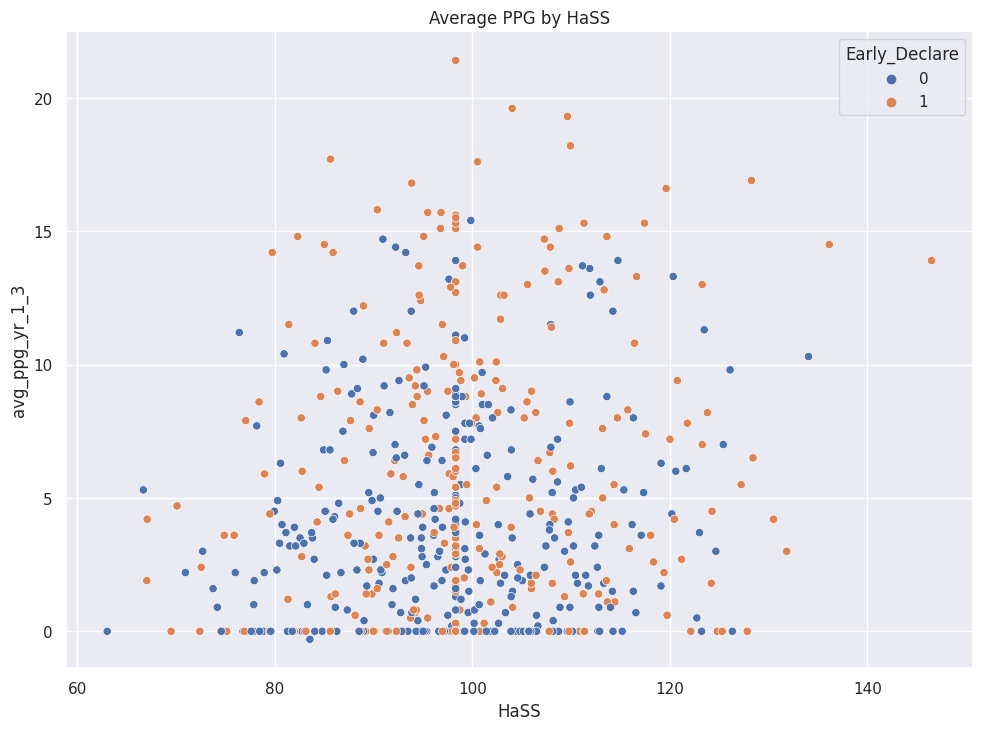

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='HaSS', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by HaSS')

[Text(0.5, 1.0, 'Average PPG by RAS')]

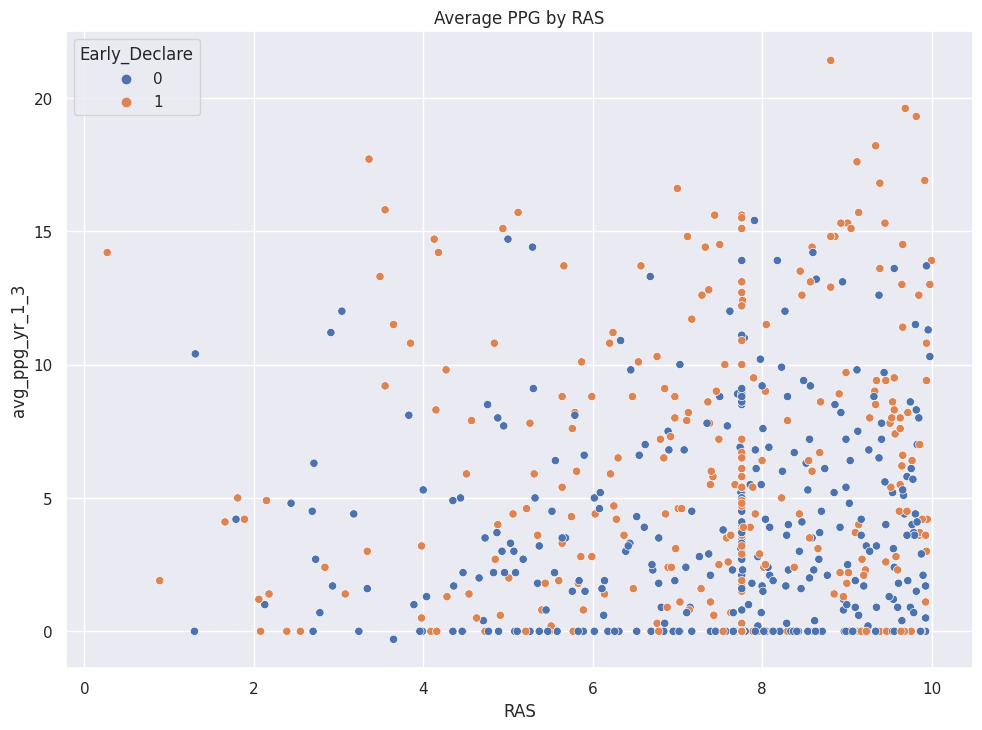

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='RAS', y="avg_ppg_yr_1_3", hue = 'Early_Declare').set(title = 'Average PPG by RAS')

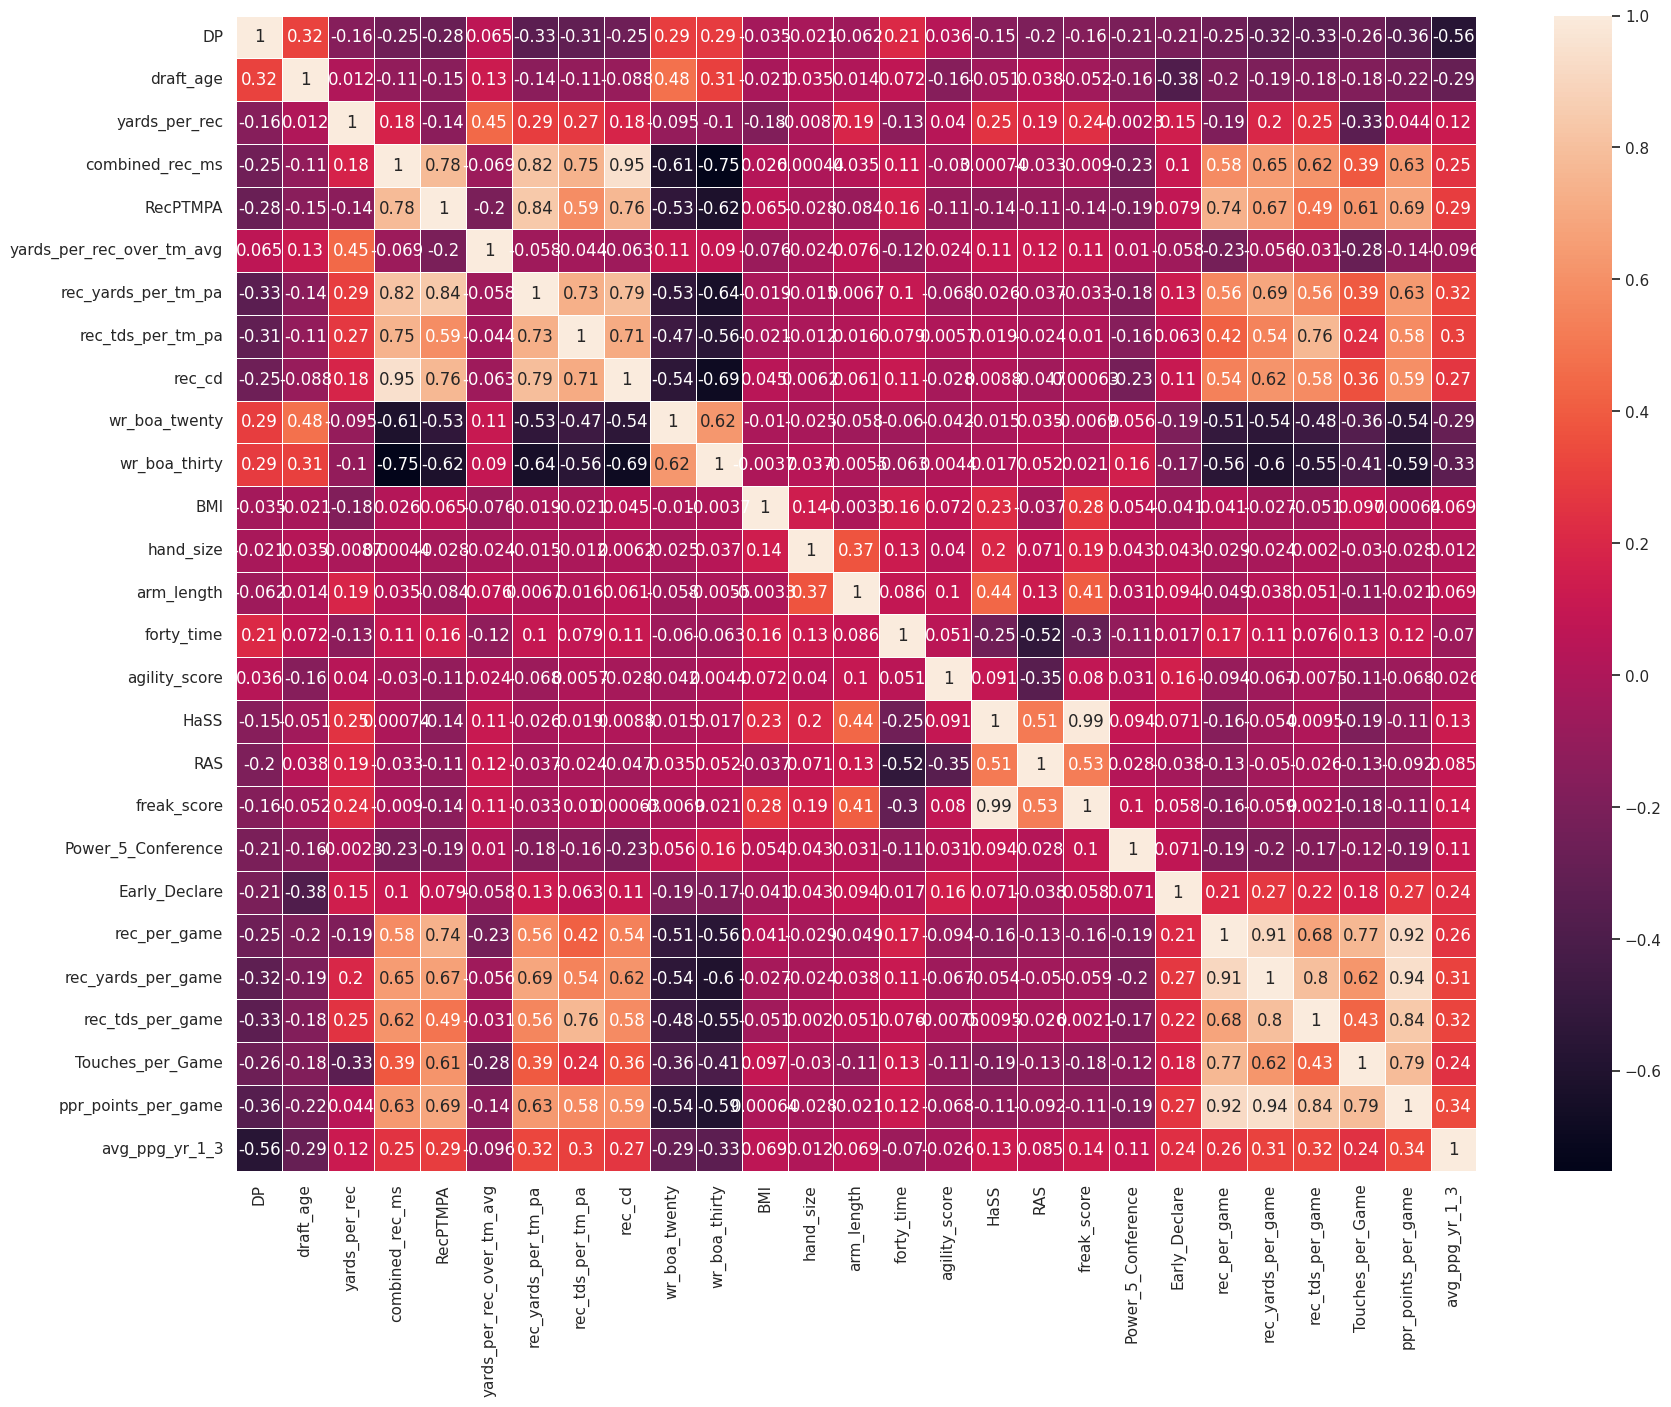

In [ ]:
draft_df_corr_mat = draft_df.drop(['Player','draft_year','DR','top_5_wr', 'top_12_wr', 'top_24_wr' ],axis = 1)
f,ax = plt.subplots(figsize=(20, 15))
corrMatrix = draft_df_corr_mat.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.5,ax=ax)
plt.show()

##1.0 - EDA Conclusions

Conclusions:


*   Wide receivers drafted earlier in the NFL Draft have greater fantasy success
*   Wide receivers drafted in round 6 or later are not very fantasy relevant. Only one player has averaged at least 10 PPG in their first 3 seasons from rounds 6 and 7
*   Early declares (player who declare they are entering the NFL Draft before their Senior year season) appear to have higher average points per game ceilings
*   No wide receivers with a BMI less than 24 or greater than 30 has averaged 15 points per game or more in their first 3 seasons
*   Average points per game tended to increase with an increase in average receiving yards per team pass attempt
*   Average points per game tended to increase with an increase in college dominator rating
*   Average points per game tended to increase with a younger breakout age
*   Wide receivers with a hand size greater than 8.5 inches have higher average points per game ceilings than wide receivers with hand size less than 8.5 inches
*   Wide receivers with an arm length greater than 30 inches have higher average points per game ceiling than wide receivers with an arm length of less than 30 inches
*   The correlation matrix reveals the predictors with the strongest correlation to average points per game in seasons 1-3 are draft capital, average receiving yards per team pass attempt, average points per game in college, breakout age 30%, and receiving TDs per game.


#D - Feature Selection

In [ ]:
np.random.seed(10)

predictors = draft_df.drop(['avg_ppg_yr_1_3','Player', 'draft_year','DR', 'draft_age', 'top_5_wr','top_12_wr','top_24_wr'],axis = 1)

In [ ]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 2 to 972
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DP                         628 non-null    float64
 1   yards_per_rec              628 non-null    float64
 2   combined_rec_ms            628 non-null    float64
 3   RecPTMPA                   628 non-null    float64
 4   yards_per_rec_over_tm_avg  628 non-null    float64
 5   rec_yards_per_tm_pa        628 non-null    float64
 6   rec_tds_per_tm_pa          628 non-null    float64
 7   rec_cd                     628 non-null    float64
 8   wr_boa_twenty              628 non-null    float64
 9   wr_boa_thirty              628 non-null    float64
 10  BMI                        628 non-null    float64
 11  hand_size                  628 non-null    float64
 12  arm_length                 628 non-null    float64
 13  forty_time                 628 non-null    float64

#E - Standardization

##1.0 Density Plots

###1.1 Density Plot of Inputs Before Standardization

Text(0.5, 1.0, 'Train Inputs Density Plot')

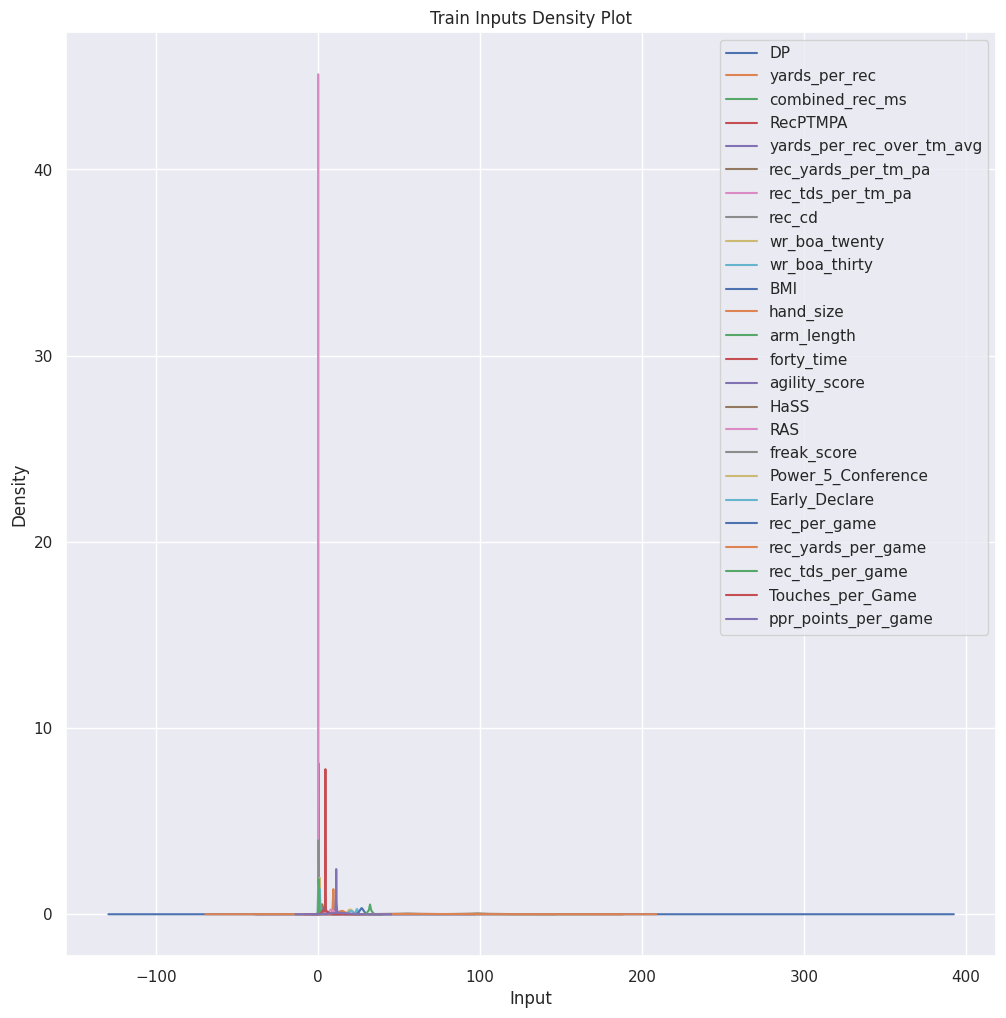

In [ ]:
#density plot of inputs
predictors.plot.density(figsize = (12, 12))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Train Inputs Density Plot")

###1.2 - Density Plot of Inputs Post Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit and transform
standard_predictors= scaler.fit_transform(predictors)
#standard_X_test = scaler.fit_transform(X_test)

standard_predictors_df = pd.DataFrame(standard_predictors)

Text(0.5, 1.0, 'Standardized Train Inputs Density Plot')

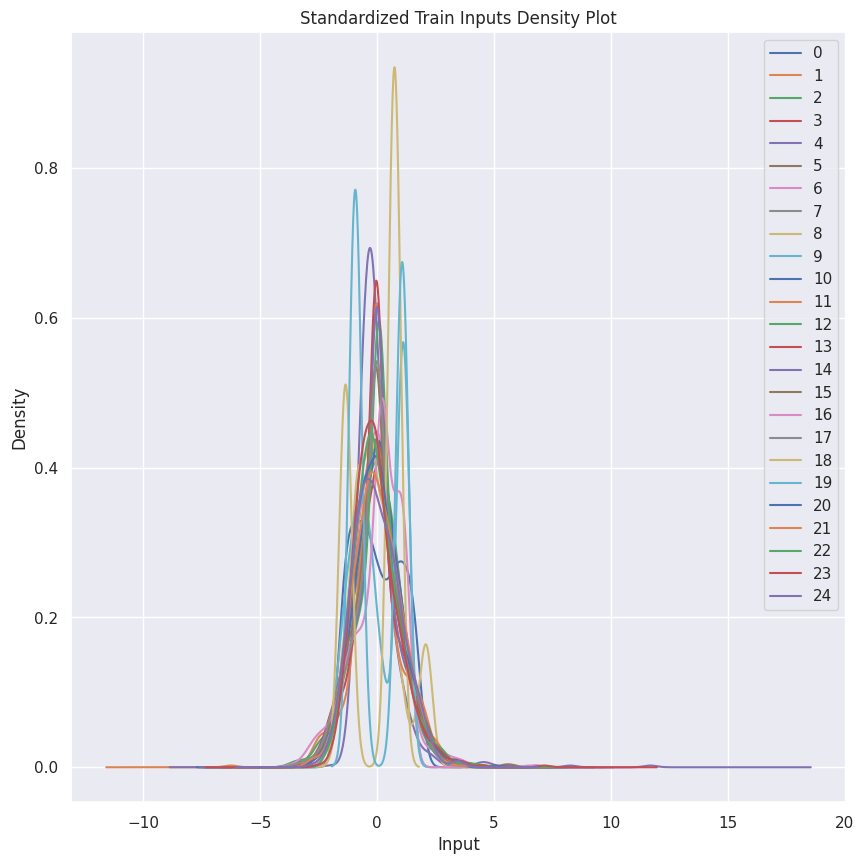

In [ ]:
standard_predictors_df.plot.density(figsize = (10, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Standardized Train Inputs Density Plot")

#F - Clustering

##1.0 K-Means Clustering

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
kmeans_model = KMeans(n_clusters=17) #12 used rule of thumb that states the square root of half the number of objects to use as k
# fit the model
kmeans_model.fit(predictors)
# assign a cluster to each example
kmeans_yhat = kmeans_model.predict(predictors)
# retrieve unique clusters
kmeans_clusters = unique(kmeans_yhat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##2.0 Cluster Analysis

In [ ]:
#create dataframe
df_cluster = pd.DataFrame()
df_cluster['player'] =  draft_df['Player']
df_cluster['cluster'] = kmeans_yhat
df_cluster['average_PPG'] = draft_df['avg_ppg_yr_1_3']
df_cluster['number_of_top_5_season'] = draft_df['top_5_wr']
df_cluster['number_of_top_12_season'] = draft_df['top_12_wr']
df_cluster['number_of_top_24_season'] = draft_df['top_24_wr']

#determine if player had 1 top 5, top 12, and/or top 24 seasons
df_cluster['top_5_season'] = np.where((df_cluster.number_of_top_5_season >= 1),1, 0)
df_cluster['top_12_season'] = np.where((df_cluster.number_of_top_12_season >= 1),1, 0)
df_cluster['top_24_season'] = np.where((df_cluster.number_of_top_24_season >= 1),1, 0)

#drop unwanted columns
df_cluster = df_cluster.drop(['number_of_top_5_season','number_of_top_12_season','number_of_top_24_season'], axis = 1)

#sort dataframe by average ppg
#df_cluster.sort_values(by=['average_PPG'],ascending=False, inplace = True)
df_cluster.head(60)


,player,cluster,average_PPG,top_5_season,top_12_season,top_24_season
2,Andrei Iosivas,6,0.0,0,0,0
3,Antoine Green,6,0.0,0,0,0
4,AT Perry,13,0.0,0,0,0
9,Cedric Tillman,1,0.0,0,0,0
10,Charlie Jones,4,0.0,0,0,0
15,Demario Douglas,0,0.0,0,0,0
16,Derius Davis,4,0.0,0,0,0
19,Dontayvion Wicks,3,0.0,0,0,0
22,Elijah Higgins,11,0.0,0,0,0
24,Grant DuBose,16,0.0,0,0,0


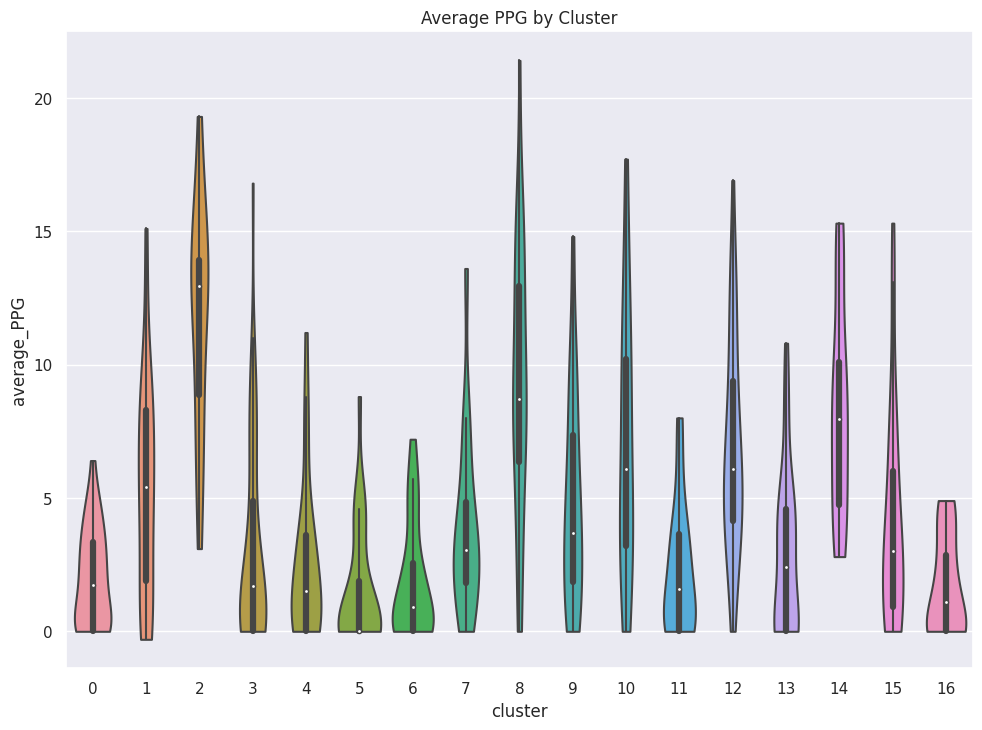

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.violinplot(data=df_cluster, x='cluster', y="average_PPG", cut=0).set(title = 'Average PPG by Cluster');

###2.1 Cluster Metrics

In [ ]:
#function that determines percentage of players in each cluster that averaged 10+ppg in their first three seasons
def above_10_percentages_func(clusters):
  for index, cluster in enumerate(clusters):
    above_10_count = len(df_cluster[(df_cluster['average_PPG']>=10) & (df_cluster['cluster']==cluster)])
    count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
    above_10_percentage = round((above_10_count/count_in_cluster)*100,2)
    above_10_percentages.append(above_10_percentage)
    count_in_clusters.append(count_in_cluster)
  return above_10_percentages
  return count_in_clusters

In [ ]:
#function that determines percentage of players in each cluster that had at least one top 5, 12, or 24 season
def top_seasons_func(clusters):
  for index, cluster in enumerate(clusters):
    top_5_count = len(df_cluster[(df_cluster['top_5_season']>=1) & (df_cluster['cluster']==cluster)])
    top_12_count = len(df_cluster[(df_cluster['top_12_season']>=1) & (df_cluster['cluster']==cluster)])
    top_24_count = len(df_cluster[(df_cluster['top_24_season']>=1) & (df_cluster['cluster']==cluster)])
    count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
    top_5_percentage = round((top_5_count/count_in_cluster)*100,2)
    top_12_percentage = round((top_12_count/count_in_cluster)*100,2)
    top_24_percentage = round((top_24_count/count_in_cluster)*100,2)
    top_5_percentages.append(top_5_percentage)
    top_12_percentages.append(top_12_percentage)
    top_24_percentages.append(top_24_percentage)
  return top_5_percentages
  return top_12_percentages
  return top_24_percentages

In [ ]:
#set clusters equal to # of clusters defined in kmeans model
clusters = np.arange(0,kmeans_model.n_clusters).tolist()

#create lists for storing cluster metrics
above_10_percentages = []
count_in_clusters = []
top_5_percentages = []
top_12_percentages = []
top_24_percentages = []

#get cluster metrics
above_10_percentages_func(clusters);
top_seasons_func(clusters);

In [ ]:
#create cluster comparison dataframe
df_hit_rate = pd.DataFrame()
df_hit_rate['cluster'] = clusters
df_hit_rate['player_count'] = count_in_clusters
df_hit_rate['percent_of_players_that_avg_10+_ppg'] = above_10_percentages
df_hit_rate['percent_of_players_that_had_top_5_season'] = top_5_percentages
df_hit_rate['percent_of_players_that_had_top_12_season'] = top_12_percentages
df_hit_rate['percent_of_players_that_had_top_24_season'] = top_24_percentages
df_hit_rate.sort_values(by=['percent_of_players_that_avg_10+_ppg'],ascending=False, inplace = True)
df_hit_rate.head(17)

,cluster,player_count,percent_of_players_that_avg_10+_ppg,percent_of_players_that_had_top_5_season,percent_of_players_that_had_top_12_season,percent_of_players_that_had_top_24_season
2,2,26,69.23,26.92,50.00,57.69
8,8,55,40.00,14.55,25.45,41.82
14,14,34,29.41,14.71,32.35,52.94
10,10,37,27.03,5.41,18.92,27.03
12,12,39,23.08,7.69,12.82,23.08
9,9,39,10.26,5.13,10.26,17.95
1,1,49,10.20,6.12,10.20,22.45
15,15,45,8.89,4.44,6.67,8.89
7,7,34,5.88,0.00,2.94,11.76
3,3,54,5.56,1.85,3.70,3.70


###2.2 Cluster Conclusions

Observing the cluster dataframe, the following conclusions can be made:
* The highest scoring players largely fall into clusters 2, 8, 14, and 10
* Cluster 2 is by far the best cluster, with 69% of the players averaging 10+ points per game over their first three seasons in the NFL 
* Cluster 2  has the best hit rate for top 5, top 12, and top 24 fantasy finishes at the wide receiver position, with ~27% of players in the cluster having at least one top 5 scoring season, 50% with a top 12 season, and 58% with a top 24 season. 
* Clusters below cluster 1 are noticeably filled with low scoring fantasy players. Players in these clusters should be avoided altogether or would be better targets for very late rounds as the players are much less likley to provide fantasy value.



#G - Save to .csv for Further Analysis in Visualization Software

In [ ]:
#Create csv file to use in visualization software
#df_cluster.to_csv("WR_clusters.csv")